<a href="https://colab.research.google.com/github/PratyushPriyamKuanr271776508/pwskills_BoostingTechiniques/blob/main/Boosting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Theoretical Questions

### 1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to create a strong learner. It works by training models sequentially, where each new model attempts to correct the errors of the previous ones. The final prediction is a weighted combination of all the weak learners' predictions.

### 2. How does Boosting differ from Bagging?
- **Boosting**:
  - Sequential training (models learn from previous mistakes)
  - Weighted combination of models
  - Focuses on reducing bias
  - Examples: AdaBoost, Gradient Boosting
  
- **Bagging**:
  - Parallel training (models are independent)
  - Equal voting or averaging
  - Focuses on reducing variance
  - Example: Random Forest

### 3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) works by:
1. Giving more weight to misclassified samples in each iteration
2. Assigning higher importance to more accurate weak learners in the final ensemble
3. Combining weak learners (often decision stumps) through weighted majority voting

### 4. Explain the working of AdaBoost with an example.
**Example with 3 iterations on a binary classification problem:**
1. First weak learner (e.g., decision stump) is trained on the original data
2. Misclassified samples get higher weights in the next iteration
3. Second weak learner is trained on the weighted data
4. Process repeats, with each new learner focusing more on previously misclassified samples
5. Final prediction is a weighted vote of all weak learners, where weights depend on each learner's accuracy

### 5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting:
- Uses gradient descent to optimize any differentiable loss function
- Builds new models to predict the residuals/errors of previous models
- Typically uses decision trees as weak learners
- More flexible than AdaBoost in terms of loss functions

Key differences:
- AdaBoost adjusts instance weights, while Gradient Boosting fits to residuals
- AdaBoost uses exponential loss, Gradient Boosting can use various losses
- AdaBoost gives weights to classifiers, Gradient Boosting adds them sequentially

### 6. What is the loss function in Gradient Boosting?
Gradient Boosting can use various loss functions depending on the problem:
- Regression: Mean squared error (MSE), Mean absolute error (MAE), Huber loss
- Classification: Logistic loss (log loss), Exponential loss (AdaBoost uses this)

### 7. How does XGBoost improve over traditional Gradient Boosting?
XGBoost (Extreme Gradient Boosting) improvements include:
- Regularization terms (L1/L2) to prevent overfitting
- More efficient implementation with parallel processing
- Handling missing values automatically
- Tree pruning with max_depth parameter
- Hardware optimization for faster training
- Built-in cross-validation

### 8. What is the difference between XGBoost and CatBoost?
- **Categorical features**: CatBoost handles them natively, XGBoost requires encoding
- **Ordered boosting**: CatBoost uses this to reduce target leakage
- **Speed**: CatBoost can be faster on categorical data
- **Default parameters**: CatBoost often requires less tuning
- **GPU support**: Both support GPU but CatBoost's implementation is more efficient for categorical data

### 9. What are some real-world applications of Boosting techniques?
- Fraud detection in financial transactions
- Customer churn prediction
- Click-through rate prediction in online advertising
- Medical diagnosis
- Credit scoring
- Recommendation systems
- Anomaly detection in manufacturing

### 10. How does regularization help in XGBoost?
Regularization in XGBoost helps prevent overfitting through:
- L1 (Lasso) and L2 (Ridge) regularization on leaf weights
- Gamma parameter for minimum loss reduction to make splits
- Maximum depth of trees
- Minimum child weight (sum of instance weight needed in a child)
- Column subsampling (both features and instances)

### 11. What are some hyperparameters to tune in Gradient Boosting models?
Key hyperparameters:
- Number of estimators (trees)
- Learning rate (shrinkage)
- Maximum depth of trees
- Minimum samples split/leaf
- Subsample ratio of training instances
- Subsample ratio of features
- Loss function type
- Regularization parameters

### 12. What is the concept of Feature Importance in Boosting?
Feature importance measures how useful each feature was in building the boosted trees. Common methods:
- **Weight**: Number of times a feature is used to split
- **Gain**: Average improvement in accuracy from splits using the feature
- **Cover**: Number of observations affected by splits using the feature

### 13. Why is CatBoost efficient for categorical data?
CatBoost is efficient for categorical data because:
- It uses one-hot encoding for low-cardinality features
- Implements ordered boosting to prevent target leakage
- Uses target statistics (like mean target value) for high-cardinality features
- Has native handling of categorical variables without manual preprocessing
- Optimized algorithms for categorical splits

## Practical Questions

### 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.


In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Predict and evaluate
y_pred = ada.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9333


### 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

# Load data
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
ada_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = ada_reg.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

MAE: 0.6498


### 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Print feature importance
for name, importance in zip(data.feature_names, gbc.feature_importances_):
    print(f"{name}: {importance:.4f}")

mean radius: 0.0000
mean texture: 0.0278
mean perimeter: 0.0002
mean area: 0.0004
mean smoothness: 0.0025
mean compactness: 0.0030
mean concavity: 0.0009
mean concave points: 0.4505
mean symmetry: 0.0005
mean fractal dimension: 0.0001
radius error: 0.0069
texture error: 0.0036
perimeter error: 0.0012
area error: 0.0084
smoothness error: 0.0006
compactness error: 0.0025
concavity error: 0.0131
concave points error: 0.0020
symmetry error: 0.0007
fractal dimension error: 0.0042
worst radius: 0.0756
worst texture: 0.0399
worst perimeter: 0.0514
worst area: 0.0382
worst smoothness: 0.0048
worst compactness: 0.0005
worst concavity: 0.0187
worst concave points: 0.2401
worst symmetry: 0.0015
worst fractal dimension: 0.0002


### 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Train model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

R-squared: 0.8669


### 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

# Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gbc):.4f}")

XGBoost Accuracy: 0.9561
Gradient Boosting Accuracy: 0.9561


In [10]:
### 19. Train a CatBoost Classifier and evaluate using F1-Score.

In [15]:
!pip install numpy==1.23.5  # A known stable version

In [19]:
!pip uninstall -y catboost
!pip install catboost

Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)


In [11]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# CatBoost
cat = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred_cat):.4f}")

F1 Score: 0.9722


### 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

MSE: 0.0487


### 21. Train an AdaBoost Classifier and visualize feature importance.

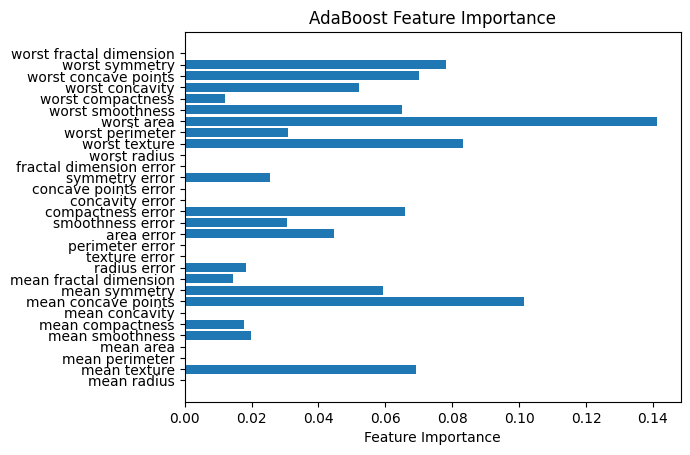

In [13]:
import matplotlib.pyplot as plt

# Train model
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Plot feature importance
plt.barh(range(len(ada.feature_importances_)), ada.feature_importances_)
plt.yticks(range(len(data.feature_names)), data.feature_names)
plt.xlabel('Feature Importance')
plt.title('AdaBoost Feature Importance')
plt.show()

### 22. Train a Gradient Boosting Regressor and plot learning curves.

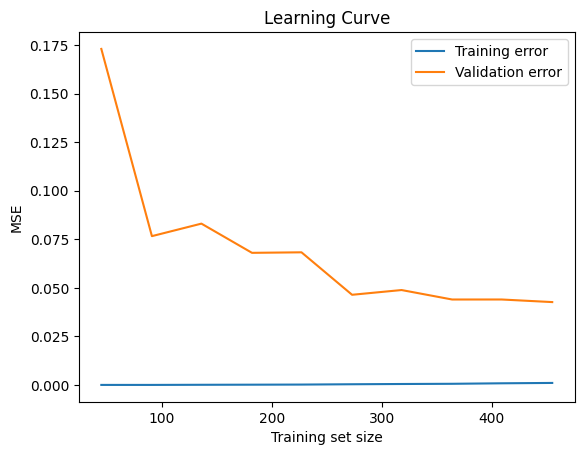

In [14]:
from sklearn.model_selection import learning_curve
import numpy as np

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(), X, y, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# Plot
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

### 23. Train an XGBoost Classifier and visualize feature importance.

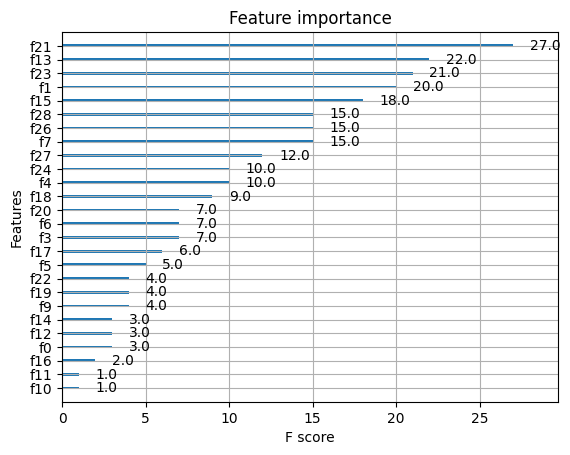

In [15]:
from xgboost import plot_importance

# Train model
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# Plot importance
plot_importance(xgb_clf)
plt.show()

### 24. Train a CatBoost Classifier and plot the confusion matrix.

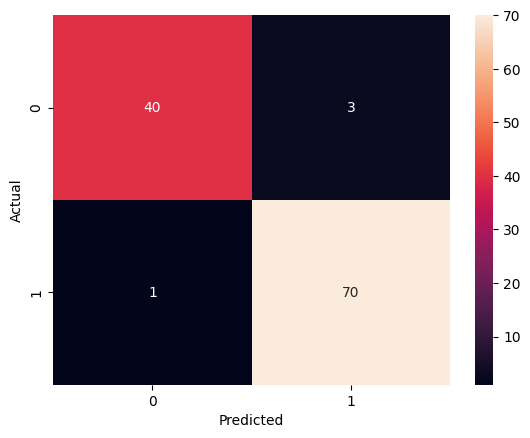

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train model
cat = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

In [17]:
n_estimators_list = [10, 50, 100, 200]
for n in n_estimators_list:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Estimators: {n}, Accuracy: {acc:.4f}")

Estimators: 10, Accuracy: 0.9649
Estimators: 50, Accuracy: 0.9649
Estimators: 100, Accuracy: 0.9737
Estimators: 200, Accuracy: 0.9737


### 26. Train a Gradient Boosting Classifier and visualize the ROC curve.

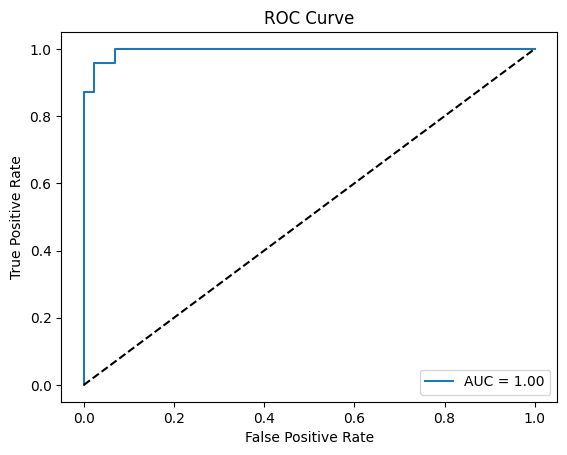

In [18]:
from sklearn.metrics import roc_curve, auc

# Train model
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Get probabilities and ROC curve
y_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [19]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]}

# Grid search
grid = GridSearchCV(XGBRegressor(n_estimators=50), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best parameters
print(f"Best learning rate: {grid.best_params_['learning_rate']}")
print(f"Best MSE: {-grid.best_score_:.4f}")

Best learning rate: 0.3
Best MSE: 0.0442


### 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [20]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Create imbalanced data
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without class weights
cat = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print("Without class weights:")
print(classification_report(y_test, y_pred))

# With class weights
cat_balanced = CatBoostClassifier(iterations=100, random_seed=42, verbose=0,
                                auto_class_weights='Balanced')
cat_balanced.fit(X_train, y_train)
y_pred_balanced = cat_balanced.predict(X_test)
print("With class weights:")
print(classification_report(y_test, y_pred_balanced))

Without class weights:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       180
           1       1.00      0.45      0.62        20

    accuracy                           0.94       200
   macro avg       0.97      0.72      0.80       200
weighted avg       0.95      0.94      0.94       200

With class weights:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       180
           1       0.59      0.65      0.62        20

    accuracy                           0.92       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.92      0.92      0.92       200



### 29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [21]:
learning_rates = [0.01, 0.1, 0.5, 1.0]
for lr in learning_rates:
    ada = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Learning rate: {lr}, Accuracy: {acc:.4f}")

Learning rate: 0.01, Accuracy: 0.8950
Learning rate: 0.1, Accuracy: 0.9200
Learning rate: 0.5, Accuracy: 0.9250
Learning rate: 1.0, Accuracy: 0.9250


### 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [22]:
from sklearn.metrics import log_loss

# Load multi-class data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict probabilities and evaluate
y_proba = xgb_clf.predict_proba(X_test)
print(f"Log loss: {log_loss(y_test, y_proba):.4f}")

Log loss: 0.0093
